## Anomaly Detection

In this notebook we demonstrate three different ways to find anomalies within a time series.

1. Isolation Forest
2. Support Vector Machine
3. Recurrent Neural Network 

We demonstrate using ECG data from the time series discord [2]

In [1]:
from examples import detect_helper, use_hyperopt
import numpy as np

data_type = 'ecg' 
filename = 'chfdb_chf13_45590.pkl'

### 1. Isolation Forest

First, we show the results of applying the Isolation Forest algorithm to the dataset. This is an unsupervised learning algorithm. It is based on the assumption that anomalies are few and have extreme behaviour. [1](#iForest)

In [3]:
detector = 'forest'
data, y_pred, y_truth, mse_loss = use_hyperopt.hyperopt_outliers(data_type, filename, detector)

100%|██████████| 20/20 [06:14<00:00, 18.73s/trial, best loss: 0.9604043807919124]


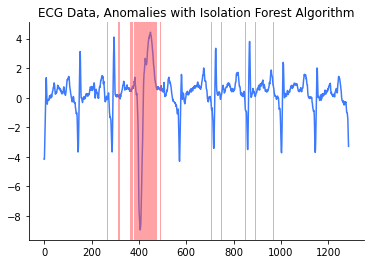

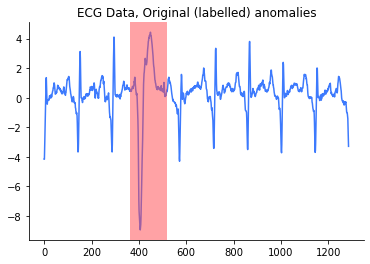

In [6]:
detect_helper.plot_outliers(data, y_pred, title='ECG Data, Anomalies with Isolation Forest Algorithm')
detect_helper.plot_outliers(data, y_truth,  title='ECG Data, Original (labelled) anomalies')

To incorporate time context, we use windows of datapoints instead of singular datapoints as inputs. This is an important hyperparameter: With it we provide the information how much knowledge about the behaviour we need to have, to decide if something is an anomaly. A big window size might also slow down computation. For the graph above, we used a window size of 100:

In [ ]:
detect_helper.plot_outliers(series_test_data, y_pred_outliers, title='ECG Data, Anomalies with Isolation Forest Algorithm, Show Windows', plot_windows=True)

### 2. Support Vector Machine

A support vector machine is a supervised learning algorithm. It builds a model to classify data based on the examples provided. This approach is computationally more demanding, but might be more successful, if anomalies are common or are characterized by a certain behaviour rather than extreme behaviour.

Because this approach is more expansive, we reduce the window size from the default 100 to 25:

In [ ]:
detector = 'svm'
svm_series_test_data, svm_y_pred_outliers = detect_helper.detect_outliers(data_type, filename, detector, window_size=5, window_step_size=1)

In [ ]:
detect_helper.plot_outliers(svm_series_test_data, svm_y_pred_outliers)

In this case the SVM converges to a suboptimal solution. However we still include it in the toolbox, because the situation may change for other problems.

### 3. Recurrent Neural Network

If enough labeled data is available, we can train a RNN how a nominal time series should progress. By comparing the actual progressing with the estimated progression, we can identify areas where unexpected behaviour takes place. The training takes some time, so we just load an already trained network. (Train the network by running `/detect/src/rnn/train_predictor.py`)

In [ ]:
from examples import detect_helper 
target, mean_prediction, sorted_errors_mean, score = detect_helper.detect_outliers_rnn(data_type, filename)

This shows, for both the training and the test dataset, the original time series, the time series the RNN predicted, the difference between those two and an anomaly score.

We can use the difference between the original time series and the predicted one to find outliers. Since the data is normalized, we simply pick 1 as the threshold.

In [ ]:
rnn_pred_outliers_std = np.zeros(target.shape)
rnn_pred_outliers_std[abs(target - mean_prediction) > 1] = -1

detect_helper.plot_outliers(target, rnn_pred_outliers_std, plot_windows=False, title='')

Using the threshold yields a similar picture:

In [ ]:
rnn_pred_outliers_score = np.zeros(target.shape)
rnn_pred_outliers_score[score.flatten() > 5000] = -1

detect_helper.plot_outliers(target, rnn_pred_outliers_score, plot_windows=False, title='')

[1] F. T. Liu, K. M. Ting and Z. Zhou, "Isolation Forest," 2008 Eighth IEEE International Conference on Data Mining, Pisa, Italy, 2008, pp. 413-422, doi: 10.1109/ICDM.2008.17.

[2] E. Keogh, J. Lin and A. Fu (2005). HOT SAX: Efficiently Finding the Most Unusual Time Series Subsequence. In The Fifth IEEE International Conference on Data Mining.

### DBSCAN (Hyperopt)

In [7]:
from examples import use_hyperopt, detect_helper
data_type = 'ecg' 
filename = 'chfdb_chf13_45590.pkl'

In [8]:
detector = 'dbscan'
data, y_pred, y_truth, mse_loss = use_hyperopt.hyperopt_outliers(data_type, filename, detector)

100%|██████████| 20/20 [00:10<00:00,  1.87trial/s, best loss: 0.02695871946082561] 


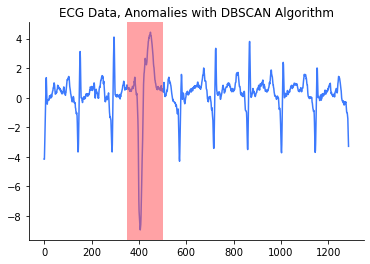

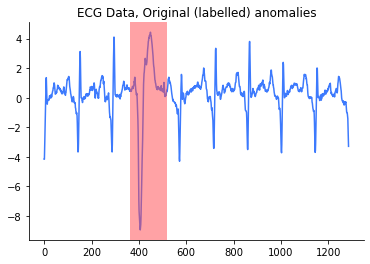

In [9]:
detect_helper.plot_outliers(data, y_pred, title='ECG Data, Anomalies with DBSCAN Algorithm')
detect_helper.plot_outliers(data, y_truth,  title='ECG Data, Original (labelled) anomalies')